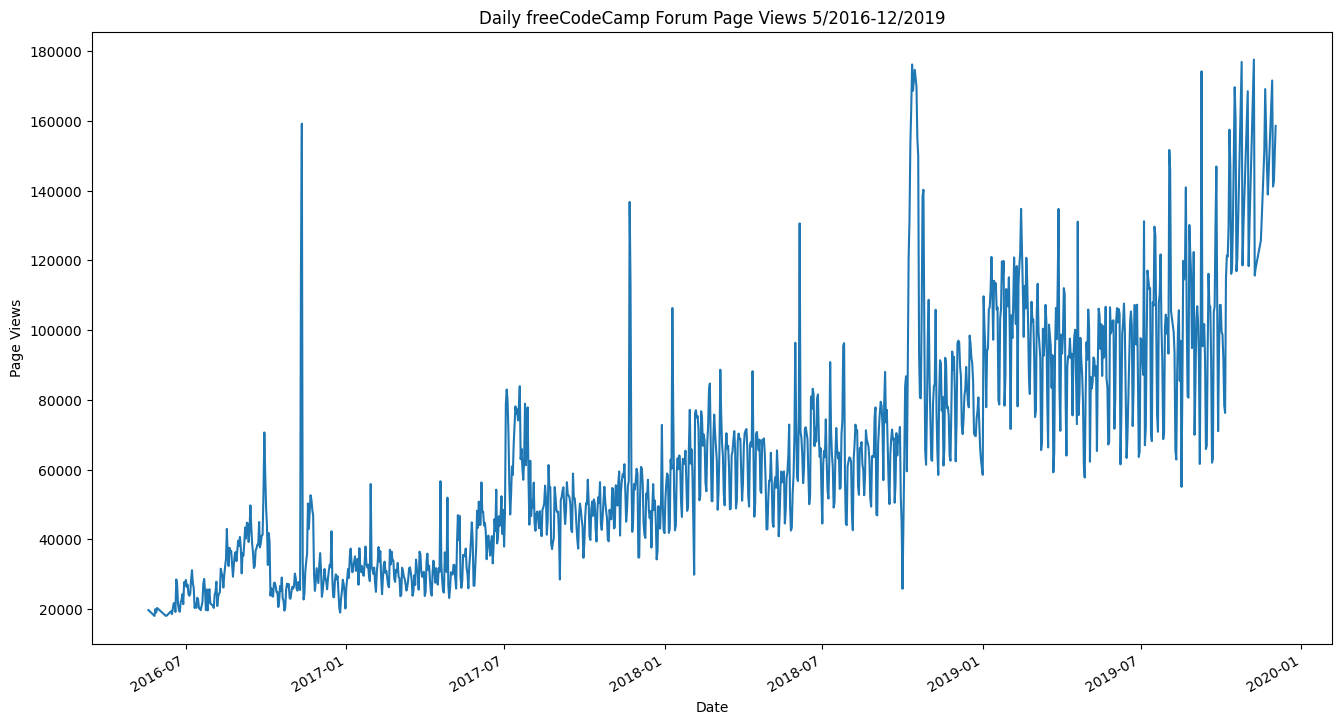

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
)

df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975)) & 
        (df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]


line_plot = df.plot(figsize=(16, 9), 
            title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
            legend=None,
            xlabel='Date',
            ylabel='Page Views')

plt.show()




<Axes: xlabel='Years', ylabel='Average Page Views'>

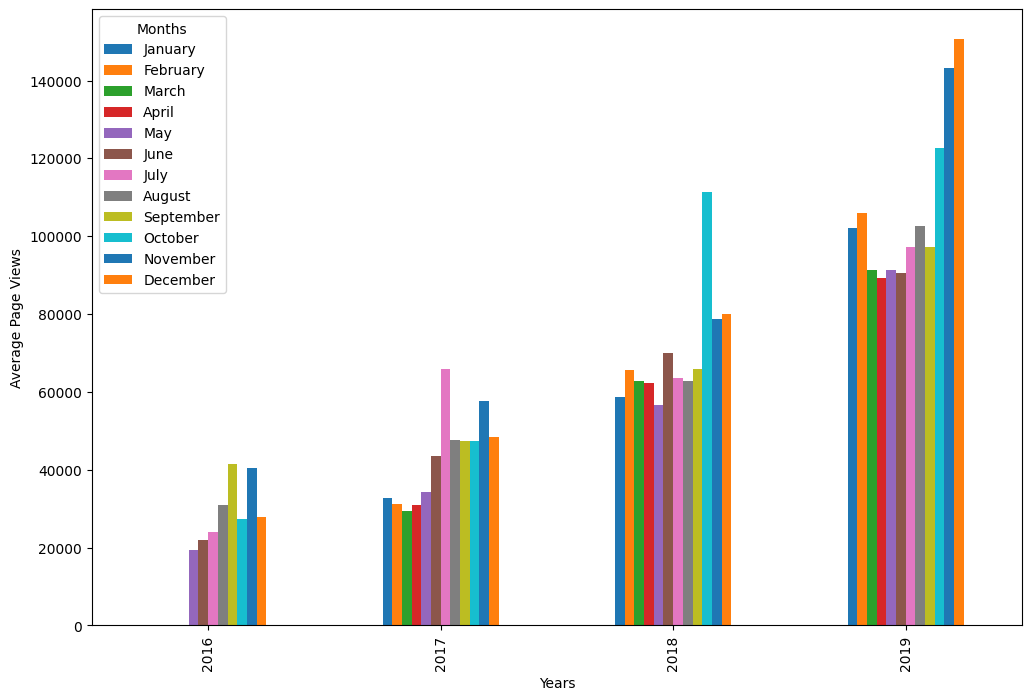

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
)

df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975)) & 
        (df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

# df['average'] = 1
# df.groupby( ['cardio', 'variable', 'value'], as_index=False).average()

# Group by month and calculate the mean for each month
df_bar = df.resample('ME').mean()

# Adding a 'Year' and 'Month' Column
df_bar['Year'] = df_bar.index.year
df_bar['Months'] = df_bar.index.strftime('%B')

# Plot using pivot_table
pivot_table = df_bar.pivot_table(values='value', index='Year', columns='Months')
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[order_months]
pivot_table.plot(kind='bar', figsize=(12, 8), xlabel='Years', ylabel='Average Page Views')


[]

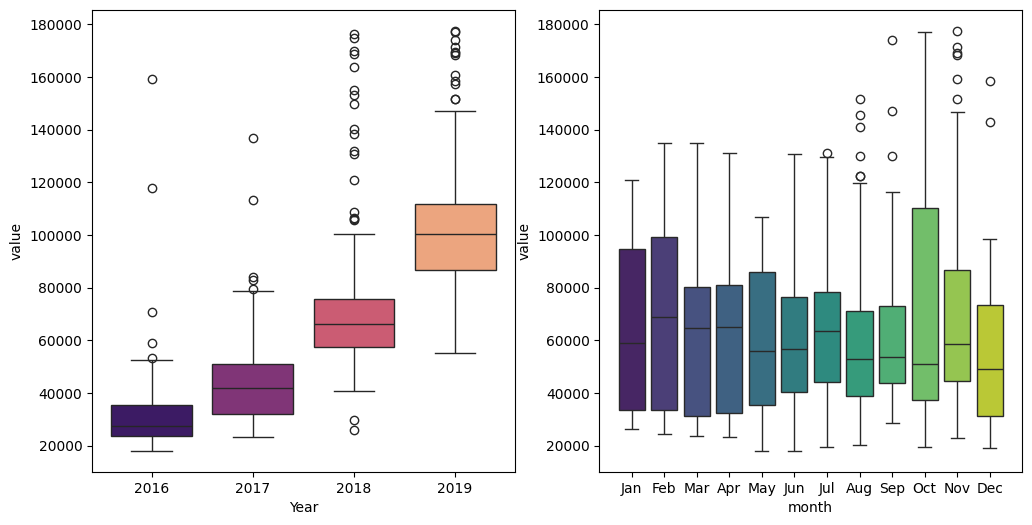

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
)

df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975)) & 
        (df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]


# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
# Rearrange to months
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=order_months, ordered=True)

# Define plot space
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# Colour palettes
palette1 = sns.color_palette("magma", len(df_box['year'].unique())) 
palette2 = sns.color_palette("viridis", len(df_box['month'].unique())) 

# Seaborn plots
sns.boxplot(ax=axes[0],data=df_box, x=df_box['year'], hue=df_box['year'], legend=False,  y='value', palette = palette1)
sns.boxplot(ax=axes[1],data=df_box, x=df_box['month'],hue=df_box['month'], legend=False, y='value', palette = palette2)

# Set Labels
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')


